# Warren Buffet's Stock Pricdictor 🔮
Calculate Berkshire Hathaway Class B(BRK-B) stock's value one year from today 

![](https://s.hdnux.com/photos/45/63/26/9909658/7/rawImage.jpg)

In [1]:
# given_data is a dictionary of stock to a tuple of information
given_data = {}

In [2]:
# apple share may 2020 = $300.63, av share price 2019 was = $ 280.10, and delta is $20.53
given_data["APPL"] = (300.63, 280.10, 20.53)
print(given_data["APPL"][0])

In [3]:
# add rest of derived data
given_data["BAC"] = (22.35, 29.89, -7.54)
given_data["KO"] = (44.75, 52.24, -7.79)
given_data["AXP"] = (20.12, 25.62, -5.50)
given_data["WFC"] = (25.61, 43.97, -18.36)
print(given_data["AXP"][0])

In [4]:
# derived_price will store share prices of stocks prices in may 2021
derived_price = {}

In [5]:
# calc price of stock share by using formula A + -k(dA) where A is price today, and dA is price change from last yr
def calcPrice(given_data):
    for stock,data in given_data.items(): 
        price_now = data[0]
        price_av2019 = data[1]
        delta = price_now - price_av2019
        k = -(price_now / price_av2019)
        derived_price[stock] = round(price_now + k*delta,2)

In [6]:
calcPrice(given_data)
derived_price

{'APPL': 278.6, 'BAC': 27.99, 'KO': 51.17, 'AXP': 24.44, 'WFC': 36.3}

Awesome! it worked... we have an esitmate of price may 2021 for the individual stocks... to see them agian

In [7]:
print(derived_price)

{'APPL': 278.6, 'BAC': 27.99, 'KO': 51.17, 'AXP': 24.44, 'WFC': 36.3}


In [8]:
# lets add what percentage of Berkshire Hathaway's revune is from each of the stocks' divendeds 
dividend_equity = {}

In [9]:
# APPL was 19.6% of Berkshire Hathaway's price. So...
dividend_equity["APPL"] = 19.6
print(dividend_equity["APPL"])

19.6


In [10]:
# Add remainng equities 
dividend_equity["BAC"] = 14.5
dividend_equity["KO"] = 16.4
dividend_equity["AXP"] = 6.2
dividend_equity["WFC"] = 21.3
print(dividend_equity["WFC"])

21.3


In [11]:
# find sum of dividened stakes
def calcTotalEquity(dividend_equity):
    sum = 0
    for percentage in dividend_equity.values():
        sum += percentage
    return sum
calcTotalEquity(dividend_equity)

78.0

In [12]:
# add remaining stakes...did this if we wanted to add another Berkshire Hathaway stock later...code is modular + ready
dividend_equity["OTHER_STAKES"] = 100 - calcTotalEquity(dividend_equity)
# total equity now should be 100
calcTotalEquity(dividend_equity)

100.0

In [13]:
# # get other stakes percentage...78 percent make the above comapnies...we want to represent the remaining as its own stock
# OTS_percent = dividend_equity["OTHER_STAKES"] /100
given_data["OTHER_STAKES"] = (172.38, 210.55, -38.17)
calcPrice(given_data)
print(derived_price)

{'APPL': 278.6, 'BAC': 27.99, 'KO': 51.17, 'AXP': 24.44, 'WFC': 36.3, 'OTHER_STAKES': 203.63}


In [14]:
# calc berk-B new price in may 2021
def calcUpdatedBRKPrice(derived_price, dividend_equity, brk_price):
    newPrice = 0
    for stock, price in derived_price.items():
        newPrice += price*dividend_equity[stock]/100
    updatedProportion = round(brk_price * newPrice /100, 2)
    print("BRK-B price day vaccine found $",brk_price, "\nBRK-B price in May 2021 $", updatedProportion)
    return updatedProportion

brk_price = given_data["OTHER_STAKES"][0]
calcUpdatedBRKPrice(derived_price, dividend_equity, brk_price)

BRK-B price day vaccine found $ 172.38 
BRK-B price in May 2021 $ 208.76


208.76

# Refactor Model ⚒️
- lets try to remodel our program if a vaccine was found 30 days from now instead of today
- to do this...twe assume the stocks that were falling due to covid 19 will keep falling...vice versa
- if BAC shares are down to 22.35 from 29.89 in 2019...they will keep decling till vaccine is found
- the decline formula we will use is a = a + log(x)^2*(dA/30) 
- where x is the days from today a vaccine is found dA is a - av2019
- By using LOG we can limit price drops over time...using power of two to emphasize log effect
- 30 comes from num of days in a month

In [15]:
import math 
# store updated stock prices if vaccine was found 30 days from today
# pastData is of form Key:Value where key is the ticker and value is tuple (stockToday, stock2019, change)
data_in_30days = {}
def calcUpdatedData(pastData, newData, numOfDays):
    for key, value in pastData.items():
        oldPrice = value[0]
        price_av2019 = value[1]
        newPrice = updateSharePrice(oldPrice, oldPrice - price_av2019, numOfDays)
        newData[key] = (newPrice, price_av2019)
        
def updateSharePrice(oldPrice, delta, days):
#     error handle edge case LOG of zero DNE
    if days == 0: 
        days = 2
#         look into mod 20 for little uptick like stock prices 
    if days % 20 == 0:
        return round(oldPrice + math.log(days)**2*delta/30,2)
    else:
        return round(oldPrice + math.log(days)**2*delta/30 - math.log(days)**.5*delta/30,2)

In [16]:
calcUpdatedData(given_data, data_in_30days, 30)
print(given_data, data_in_30days)

{'APPL': (300.63, 280.1, 20.53), 'BAC': (22.35, 29.89, -7.54), 'KO': (44.75, 52.24, -7.79), 'AXP': (20.12, 25.62, -5.5), 'WFC': (25.61, 43.97, -18.36), 'OTHER_STAKES': (172.38, 210.55, -38.17)} {'APPL': (307.28, 280.1), 'BAC': (19.91, 29.89), 'KO': (42.32, 52.24), 'AXP': (18.34, 25.62), 'WFC': (19.66, 43.97), 'OTHER_STAKES': (160.01, 210.55)}


In [17]:
# a better way of visualizing the change in data
def compareData(pastData, newData, numOfDays):
    print("\nheres the changes in prices if vaccine was found in " + str(numOfDays) +" days...")
    print("TICKER \"price today\" --> \"price day of discovery\"")
    for key, value in pastData.items():
        print(key,"", value[0], "-->", newData[key][0])
compareData(given_data, data_in_30days, 30)


heres the changes in prices if vaccine was found in 30 days...
TICKER "price today" --> "price day of discovery"
APPL  300.63 --> 307.28
BAC  22.35 --> 19.91
KO  44.75 --> 42.32
AXP  20.12 --> 18.34
WFC  25.61 --> 19.66
OTHER_STAKES  172.38 --> 160.01


In [18]:
# lets store the calcualted price in an another dict with values of arrays of prices based on what day vaccince was found
data_in_Xdays = {}

def initData_in_Xdays():
    for key in given_data:
        data_in_Xdays[key] = []
    print(data_in_Xdays)
    
initData_in_Xdays()



{'APPL': [], 'BAC': [], 'KO': [], 'AXP': [], 'WFC': [], 'OTHER_STAKES': []}


In [19]:
# store price of individual stocks on day X when a vaccine was found
def storeDataInXDays(data_in_Xdays, given_data): 
    for key in given_data:
        data_in_Xdays[key].append(given_data[key][0])
        
# storing data of individual stock prices if vaccine was found today 
storeDataInXDays(data_in_Xdays, given_data)
print(data_in_Xdays)

# storing data of individual stock prices if vaccine was found 30 days from today
storeDataInXDays(data_in_Xdays, data_in_30days)
print(data_in_Xdays)

{'APPL': [300.63], 'BAC': [22.35], 'KO': [44.75], 'AXP': [20.12], 'WFC': [25.61], 'OTHER_STAKES': [172.38]}
{'APPL': [300.63, 307.28], 'BAC': [22.35, 19.91], 'KO': [44.75, 42.32], 'AXP': [20.12, 18.34], 'WFC': [25.61, 19.66], 'OTHER_STAKES': [172.38, 160.01]}


In [20]:
# lets calc our BRK price again if a vaccine was found today 
print("if vaccine was found today...")
brk_price = given_data["OTHER_STAKES"][0]
futurePrice = calcUpdatedBRKPrice(derived_price, dividend_equity, brk_price)

brk_prices_if_vaccineXdays = []
brk_prices_if_vaccineXdays.append((0,futurePrice))

if vaccine was found today...
BRK-B price day vaccine found $ 172.38 
BRK-B price in May 2021 $ 208.76


In [21]:
# now clac updatedBRK Price if Vaccine found in 30 days
print("if vaccine was found 30 days from today...")
calcPrice(data_in_30days)
brk_price = data_in_30days["OTHER_STAKES"][0]
futurePrice = calcUpdatedBRKPrice(derived_price, dividend_equity, brk_price)

# brk_prices_if_vaccineXdays = []
brk_prices_if_vaccineXdays.append((30,futurePrice))

if vaccine was found 30 days from today...
BRK-B price day vaccine found $ 160.01 
BRK-B price in May 2021 $ 188.98


## Results are positive! 🎉
If vaccine was found later from today BRK shares would be a little lower than if it was found today...as data shows

lets test our modular code and put it to the test by determining BRK price if vaccine was found in X days...we will call:

- calcUpdatedData(pastData, newData, numOfDays)
- compareData(pastData, newData, numOfDays)
- storeDataInXDays(data_in_Xdays, newData)
- calcUpdatedBRKPrice(derived_price, dividend_equity, brk_price)
- brk_prices_if_vaccineXdays.append((0,futurePrice))

**This is our update function**

In [22]:
def vaccineFoundInXDays(numOfDays):
    data_before_vaccine_found = {}
    calcUpdatedData(given_data, data_before_vaccine_found , numOfDays)
    compareData(given_data, data_before_vaccine_found , numOfDays)
    storeDataInXDays(data_in_Xdays, data_before_vaccine_found )
    
    calcPrice(data_before_vaccine_found )
    brk_price = data_before_vaccine_found["OTHER_STAKES"][0]
    
    futurePrice = calcUpdatedBRKPrice(derived_price, dividend_equity, brk_price)
    brk_prices_if_vaccineXdays.append((numOfDays,futurePrice))


lets call our update function with if we found vaccine in 30 days and see if matches with the previous results...
> if vaccine was found 30 days from today... 

> BRK-B price day vaccine found $ 169.24 

> BRK-B price in May 2021 $ 203.8

In [23]:
vaccineFoundInXDays(30)


heres the changes in prices if vaccine was found in 30 days...
TICKER "price today" --> "price day of discovery"
APPL  300.63 --> 307.28
BAC  22.35 --> 19.91
KO  44.75 --> 42.32
AXP  20.12 --> 18.34
WFC  25.61 --> 19.66
OTHER_STAKES  172.38 --> 160.01
BRK-B price day vaccine found $ 160.01 
BRK-B price in May 2021 $ 188.98


## Results are positive! 🎉
results from update function AKA vaccineFoundInXDays(numOFDays) match the results calculated prev


Lets calculate BRK-B Prices for 60 days and 90 days...
each should be getting smaller as the days a vaccine found increaeses

In [24]:
vaccineFoundInXDays(60)


heres the changes in prices if vaccine was found in 60 days...
TICKER "price today" --> "price day of discovery"
APPL  300.63 --> 312.1
BAC  22.35 --> 18.14
KO  44.75 --> 40.56
AXP  20.12 --> 17.05
WFC  25.61 --> 15.35
OTHER_STAKES  172.38 --> 151.05
BRK-B price day vaccine found $ 151.05 
BRK-B price in May 2021 $ 174.34


In [25]:
vaccineFoundInXDays(90)


heres the changes in prices if vaccine was found in 90 days...
TICKER "price today" --> "price day of discovery"
APPL  300.63 --> 313.03
BAC  22.35 --> 17.79
KO  44.75 --> 40.22
AXP  20.12 --> 16.8
WFC  25.61 --> 14.52
OTHER_STAKES  172.38 --> 149.32
BRK-B price day vaccine found $ 149.32 
BRK-B price in May 2021 $ 171.49


## Bringing it all in...
we have been informally storing two sets of data

-  **data_in_Xdays** which stores stock prices of individual stocks before vaccine is found
- **brk_prices_if_vaccineXdays** which stores prices of BRK stock in may 2021 if vaccine found on day X

we would like to plot our stored results by running a sweep series

In [26]:
from modsim import *
def plotIndividualStock(data_in_Xdays, brk_prices_if_vaccineXdays, stock):
    sweep = SweepSeries()
    for i, data in enumerate(brk_prices_if_vaccineXdays):
        daysTillVaccineFound = data[0]
        stockPriceTillVaccineFound = data[1]
        sweep[daysTillVaccineFound] = data_in_Xdays[stock][i]
    return sweep

stock = 'BAC'
plot(plotIndividualStock(data_in_Xdays, brk_prices_if_vaccineXdays, stock), 
     label= stock +' Price')

decorate(title= stock +' Price on day the vaccine is found',
         ylabel='Price of ' + stock +  ' Stock', 
         xlabel='Number of days till vaccine is found')
    


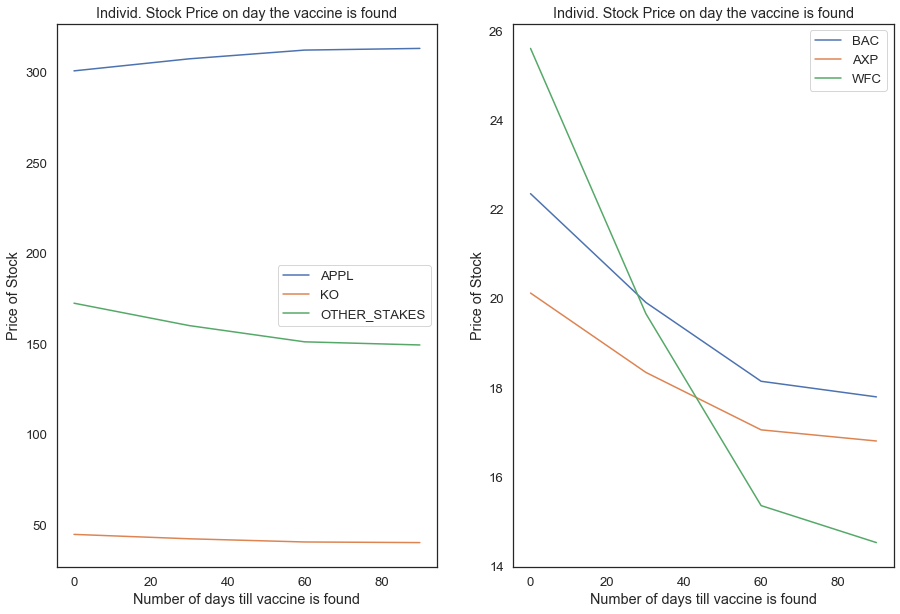

In [27]:
import matplotlib.pyplot as plt
def plotAllStocks(data_in_Xdays, brk_prices_if_vaccineXdays):
    num = 0
    fig, ax = plt.subplots(1,2,figsize=(15,10))
    for key in data_in_Xdays:
        sweep = plotIndividualStock(data_in_Xdays, brk_prices_if_vaccineXdays, key)
        label =  key
        if data_in_Xdays[key][0] > 30:
            ax[0].plot(sweep,label=label)
            ax[0].legend(loc="best")
    
        else:
            ax[1].plot(sweep, label=label)
            ax[1].legend(loc="upper right")
    
    for ax in ax.flat:
        ax.set(title= 'Individ. Stock Price on day the vaccine is found', 
               xlabel='Number of days till vaccine is found', 
               ylabel='Price of Stock')
        
        
        
plotAllStocks(data_in_Xdays, brk_prices_if_vaccineXdays)

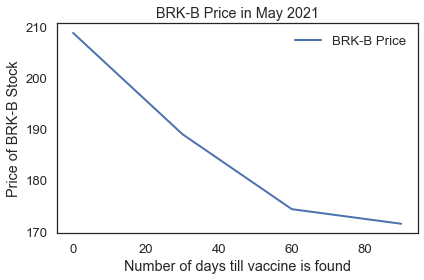

In [28]:
def plotBRK(brk_prices_if_vaccineXdays):
    sweep = SweepSeries()
    for data in brk_prices_if_vaccineXdays:
        daysTillVaccineFound = data[0]
        brkPriceMay2021 = data[1]
#         print(daysTillVaccineFound, brkPriceMay2021)
        sweep[daysTillVaccineFound] = brkPriceMay2021
        
    plot(sweep, label='BRK-B Price')

    decorate(title='BRK-B Price in May 2021',
             ylabel='Price of BRK-B Stock', 
             xlabel='Number of days till vaccine is found')
    
plotBRK(brk_prices_if_vaccineXdays)  

## One Final Sweep...
Lets see how stock prices are effected by sweeping thru each month till May 2021

In [29]:
# lets reset our prexisting data store vars
data_in_Xdays = {}
initData_in_Xdays()
brk_prices_if_vaccineXdays = []

{'APPL': [], 'BAC': [], 'KO': [], 'AXP': [], 'WFC': [], 'OTHER_STAKES': []}


In [30]:
# get months range today (may 2020) to 12 months from now (april 2021)
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

def get_forward_month_list():
    now = datetime.now()
    return [(now + relativedelta(months=i)).strftime('%b') for i in range(12)]
month_vaccine_found = get_forward_month_list()
print(month_vaccine_found)

['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr']


In [31]:
# lets create our num of days till vaccine found array 
days_till_vaccine_found = linspace(0, 330, len(month_vaccine_found))
print(days_till_vaccine_found)

[  0.  30.  60.  90. 120. 150. 180. 210. 240. 270. 300. 330.]


In [32]:
# call our update function for each of the 12 months starting today
def didDiscoverVaccine():
    for month in days_till_vaccine_found:
#         if month == 360: break
        vaccineFoundInXDays(month)
didDiscoverVaccine()


heres the changes in prices if vaccine was found in 0.0 days...
TICKER "price today" --> "price day of discovery"
APPL  300.63 --> 300.39
BAC  22.35 --> 22.44
KO  44.75 --> 44.84
AXP  20.12 --> 20.18
WFC  25.61 --> 25.83
OTHER_STAKES  172.38 --> 172.83
BRK-B price day vaccine found $ 172.83 
BRK-B price in May 2021 $ 209.46

heres the changes in prices if vaccine was found in 30.0 days...
TICKER "price today" --> "price day of discovery"
APPL  300.63 --> 307.28
BAC  22.35 --> 19.91
KO  44.75 --> 42.32
AXP  20.12 --> 18.34
WFC  25.61 --> 19.66
OTHER_STAKES  172.38 --> 160.01
BRK-B price day vaccine found $ 160.01 
BRK-B price in May 2021 $ 188.98

heres the changes in prices if vaccine was found in 60.0 days...
TICKER "price today" --> "price day of discovery"
APPL  300.63 --> 312.1
BAC  22.35 --> 18.14
KO  44.75 --> 40.56
AXP  20.12 --> 17.05
WFC  25.61 --> 15.35
OTHER_STAKES  172.38 --> 151.05
BRK-B price day vaccine found $ 151.05 
BRK-B price in May 2021 $ 174.34

heres the changes

### lets view the above data on something more visual...

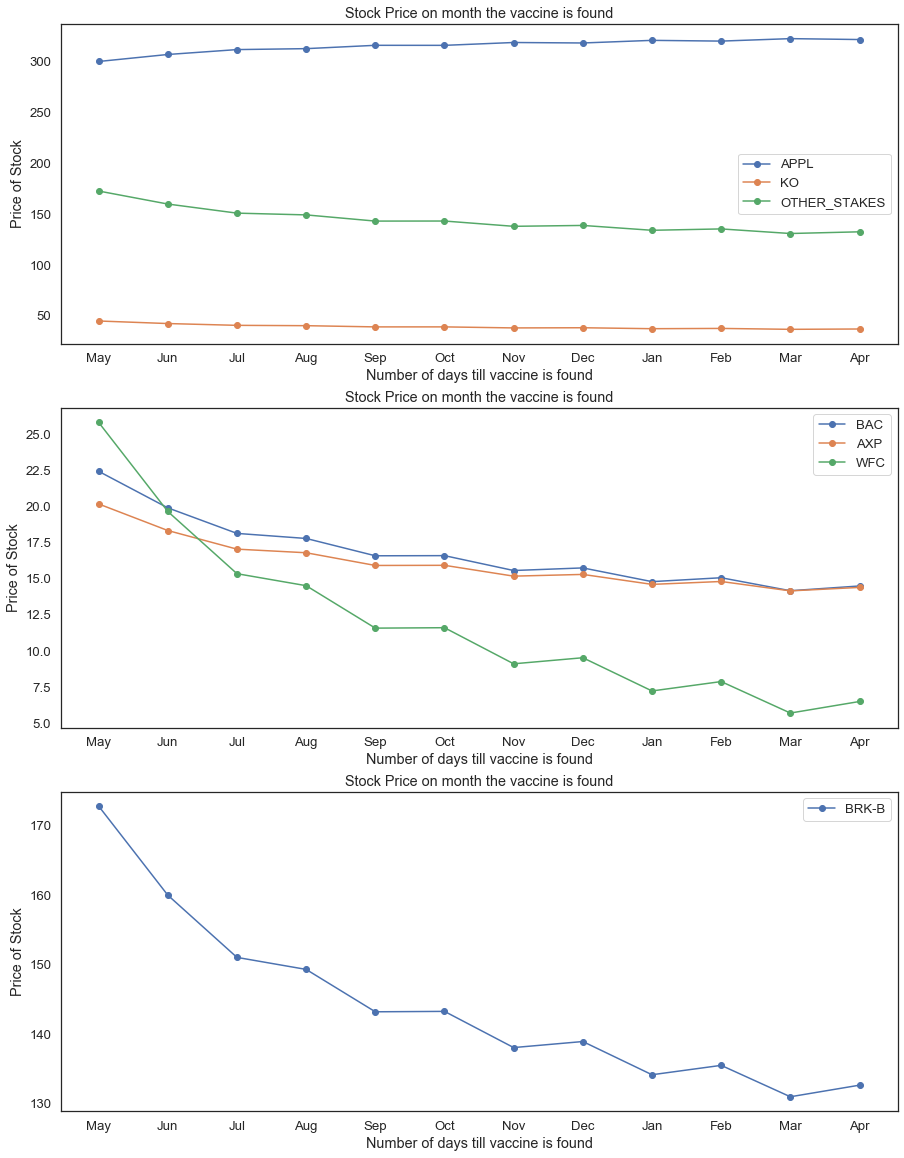

In [33]:
# small change to the data for nicer labels and adjust width of graphs
def plotAllStocks(data_in_Xdays, brk_prices_if_vaccineXdays):
    num = 0
    fig, ax = plt.subplots(3,1,figsize=(15,20))
    for i, key in enumerate(data_in_Xdays):
        sweep = plotIndividualStock(data_in_Xdays, brk_prices_if_vaccineXdays, key)
        label =  key
        if data_in_Xdays[key][0] > 30:
            ax[0].plot(sweep, marker='o', label=label)
            ax[0].legend(loc="best")
        else:
            ax[1].plot(sweep, marker='o', label=label)
            ax[1].legend(loc="upper right")
        if key == 'OTHER_STAKES':
            ax[2].plot(sweep, marker='o', label='BRK-B')
            ax[2].legend(loc="best")
    
    for ax in ax.flat:
        ax.set(title= 'Stock Price on month the vaccine is found', 
               xlabel='Number of days till vaccine is found', 
               ylabel='Price of Stock')
        ax.set_xticks(days_till_vaccine_found)
        ax.set_xticklabels(month_vaccine_found)
        
        
        
        
plotAllStocks(data_in_Xdays, brk_prices_if_vaccineXdays)

### Here's another way of viewing the individual Stock prices 

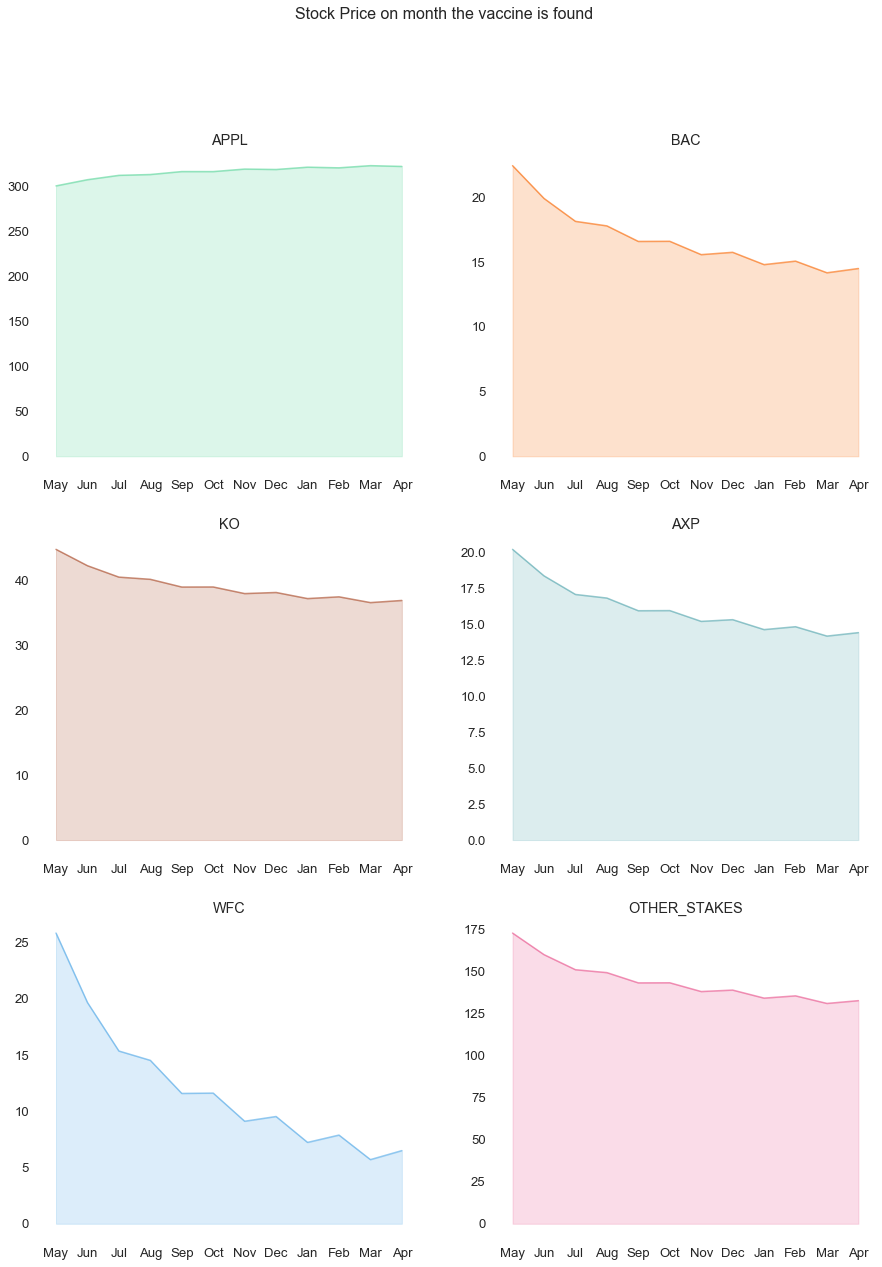

In [34]:
# small change to the data for nicer labels and adjust width of graphs
import random
import seaborn as sns

def plotAllStocks(data_in_Xdays, brk_prices_if_vaccineXdays):
    num = 0
    fig, ax = plt.subplots(3,2,figsize=(15,20))
    color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(len(data_in_Xdays))]
    
    for i, stock in enumerate(data_in_Xdays):
        sweep = plotIndividualStock(data_in_Xdays, brk_prices_if_vaccineXdays, stock)
        x, y = int((i)/2), i%2
        
        ax[x,y].plot(sweep, label=stock, c=color[i], alpha=0.6)
        ax[x,y].title.set_text(stock)
        ax[x,y].fill_between(days_till_vaccine_found, data_in_Xdays[stock], color=color[i], alpha=0.2)
    
    for ax in ax.flat:
#         ax.set(xlabel='Month vaccine is found', 
#                ylabel='Price of Stock')
        ax.set_xticks(days_till_vaccine_found)
        ax.set_xticklabels(month_vaccine_found)
    fig.suptitle("Stock Price on month the vaccine is found", fontsize=16)
    sns.despine(left=True, bottom=True, right=True)
        
# print("STOCK PRICES BASED ON THE MONTH VACCINE FOUND")        
plotAllStocks(data_in_Xdays, brk_prices_if_vaccineXdays)


![](https://media3.giphy.com/media/EDt1m8p5hqXG8/giphy.gif)

> -mood after above code finally worked w proper axes labels and ticks

## Last but not least...
Let's see how BRK-B shares change with changes in the individual stock prices 

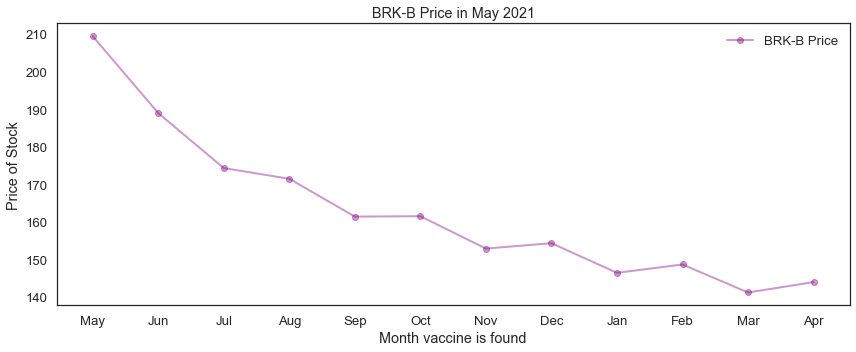

In [35]:
# PLOT BRK Shares
def plotBRK(brk_prices_if_vaccineXdays):
    sweep = SweepSeries()
    for data in brk_prices_if_vaccineXdays:
        daysTillVaccineFound = data[0]
        brkPriceMay2021 = data[1]
        sweep[daysTillVaccineFound] = brkPriceMay2021
    plot(month_vaccine_found, sweep, marker='o', label='BRK-B Price', color ="purple", alpha=0.4)

plt.figure(figsize=(12,5))    
plotBRK(brk_prices_if_vaccineXdays) 
decorate(title='BRK-B Price in May 2021',
         ylabel='Price of Stock', 
         xlabel='Month vaccine is found')

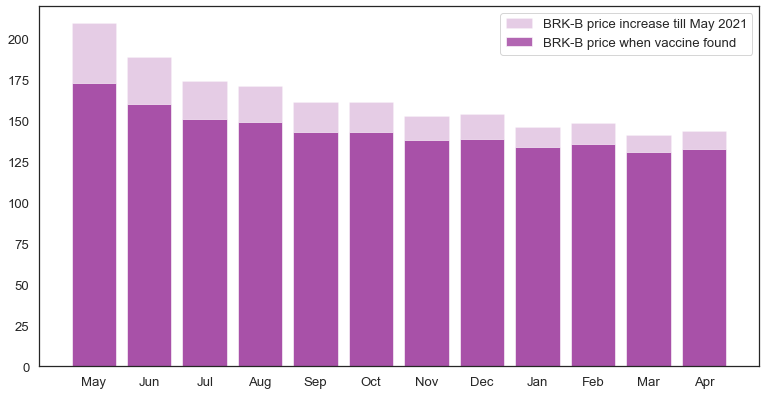

In [36]:
def plotCompareBrk():
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    
    months_range = month_vaccine_found
    brk_may2021Prices = [i[1] for i in brk_prices_if_vaccineXdays]
    brk_dayVaccineFoundPrice = data_in_Xdays['OTHER_STAKES']
    base = [0]*len(brk_dayVaccineFoundPrice)
    
    ax.bar(months_range, brk_may2021Prices,color ="purple", alpha=0.2)
    ax.bar(months_range, brk_dayVaccineFoundPrice,bottom= base, color ="purple", alpha=0.6)
    ax.legend(labels=['BRK-B price increase till May 2021', 'BRK-B price when vaccine found'])
    plt.show()
plt.rcParams['figure.figsize'] = [10, 5]    
plotCompareBrk()

Thus, the eariler a vaccine is found, the more chance to recover, the higher BRK-B share prices will be in May 2021, 